In [1]:
"""
细胞迁移数据处理与分析
功能：读取细胞轨迹数据，进行坐标归一化和数据整理
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import symbols
from scipy import stats

# ===== 全局配置 =====
CONFIG = {
    'bar': 1.243,
    'interval': 15,
    'resolution': 1024,
    'frame': 30,
    'data_path': r'G:\我的坚果云\My Projects\刘妍-微通道\Fig.2 and related Figs\B-细胞迁移速度表征\A549 cells\A549 VELO.xlsx'
}

# 符号变量和计算参数
x = symbols('x')
k = CONFIG['bar'] * 60 / CONFIG['interval']


def load_and_clean_data(file_path):
    """
    读取并清洗细胞数据

    参数:
        file_path: Excel文件路径

    返回:
        清洗后的DataFrame
    """
    # 读取Excel数据
    cell_data = pd.read_excel(file_path, sheet_name='Sheet1')

    # 删除全空的行和列
    cell_data = cell_data.dropna(axis=0, how='all')
    cell_data = cell_data.dropna(axis=1, how='all')

    # 重置索引
    cell_data.reset_index(inplace=True, drop=True)

    # 选择需要的列
    required_columns = ['Distance', 'period', 'X', 'Y', 'Slice n°', 'cell ID']
    cell_data = cell_data[required_columns]

    return cell_data


def normalize_coordinates(cell_data):
    """
    将坐标归一化为相对于起始位置的坐标

    参数:
        cell_data: 原始细胞数据DataFrame

    返回:
        添加了n_X和n_Y列的DataFrame
    """
    # 找到每个细胞的起始位置（Distance == -1 标记细胞起始）
    cell_start_indices = list(cell_data.index[cell_data['Distance'] == -1])
    cell_start_indices.append(len(cell_data))  # 添加结束位置

    # 初始化归一化坐标列
    cell_data['n_X'] = 0.0
    cell_data['n_Y'] = 0.0

    # 对每个细胞进行坐标归一化
    for j in range(len(cell_start_indices) - 1):
        start_idx = cell_start_indices[j]
        end_idx = cell_start_indices[j + 1]

        # 获取该细胞的起始坐标
        origin_x = cell_data.loc[start_idx, 'X']
        origin_y = cell_data.loc[start_idx, 'Y']

        # 使用向量化操作批量计算归一化坐标
        idx_range = slice(start_idx, end_idx)
        cell_data.loc[idx_range, 'n_X'] = cell_data.loc[idx_range, 'X'] - origin_x
        cell_data.loc[idx_range, 'n_Y'] = cell_data.loc[idx_range, 'Y'] - origin_y

    return cell_data


def modify_period_groups(cell_data, old_period=100, new_period=150):
    """
    修改指定period的分组（可选功能）

    参数:
        cell_data: 细胞数据DataFrame
        old_period: 原period值
        new_period: 新period值

    返回:
        修改后的DataFrame
    """
    cell_data.loc[cell_data['period'] == old_period, 'period'] = new_period
    return cell_data


def sort_data(cell_data):
    """
    按照period、cell ID、Slice n°排序

    参数:
        cell_data: 细胞数据DataFrame

    返回:
        排序后的DataFrame
    """
    sorted_data = cell_data.sort_values(
        by=['period', 'cell ID', 'Slice n°'],
        ascending=True
    )
    sorted_data.reset_index(inplace=True, drop=True)

    return sorted_data


def main():
    """主函数"""
    print("=" * 50)
    print("开始处理细胞迁移数据...")
    print("=" * 50)

    # 1. 读取和清洗数据
    print("\n[1/4] 读取数据...")
    cell_data = load_and_clean_data(CONFIG['data_path'])
    print(f"    数据读取完成，共 {len(cell_data)} 行")

    # 2. 坐标归一化
    print("\n[2/4] 坐标归一化处理...")
    cell_data = normalize_coordinates(cell_data)
    print("    坐标归一化完成")

    # 3. 数据排序
    print("\n[3/4] 数据排序...")
    temp_pd = sort_data(cell_data)
    print("    排序完成")

    # 4. 可选：修改分组（如需要，取消注释）
    print("\n[4/4] 数据整理...")
    # temp_pd = modify_period_groups(temp_pd, old_period=100, new_period=150)

    # 保存处理结果
    cell_len = temp_pd.copy()

    # 显示结果
    print("\n" + "=" * 50)
    print("数据处理完成！")
    print("=" * 50)
    print("\n处理后的数据预览：")
    print(temp_pd.head(10))
    print(f"\n数据形状: {temp_pd.shape}")
    print(f"包含细胞数: {temp_pd['cell ID'].nunique()}")
    print(f"Period分组: {sorted(temp_pd['period'].unique())}")

    return temp_pd, cell_len

# ===== 程序入口 =====
if __name__ == '__main__':
    temp_pd, cell_len = main()
    print('\n程序执行完毕！')


开始处理细胞迁移数据...

[1/4] 读取数据...
    数据读取完成，共 1184 行

[2/4] 坐标归一化处理...
    坐标归一化完成

[3/4] 数据排序...
    排序完成

[4/4] 数据整理...

数据处理完成！

处理后的数据预览：
   Distance  period    X    Y  Slice n°  cell ID   n_X   n_Y
0    -1.000      50  388  805        19        8   0.0   0.0
1     0.903      50  388  812        20        8   0.0   7.0
2     1.569      50  390  824        21        8   2.0  19.0
3     0.752      50  393  829        22        8   5.0  24.0
4     1.290      50  393  839        23        8   5.0  34.0
5     1.569      50  395  851        24        8   7.0  46.0
6     1.425      50  396  862        25        8   8.0  57.0
7     0.785      50  397  868        26        8   9.0  63.0
8     0.865      50  400  874        27        8  12.0  69.0
9     1.553      50  401  886        28        8  13.0  81.0

数据形状: (1184, 8)
包含细胞数: 50
Period分组: [np.int64(50), np.int64(100), np.int64(150), np.int64(200)]

程序执行完毕！


Period boundaries: [-1, 446, 767, 1083, 1184]
Unique periods: [ 50 100 150 200]


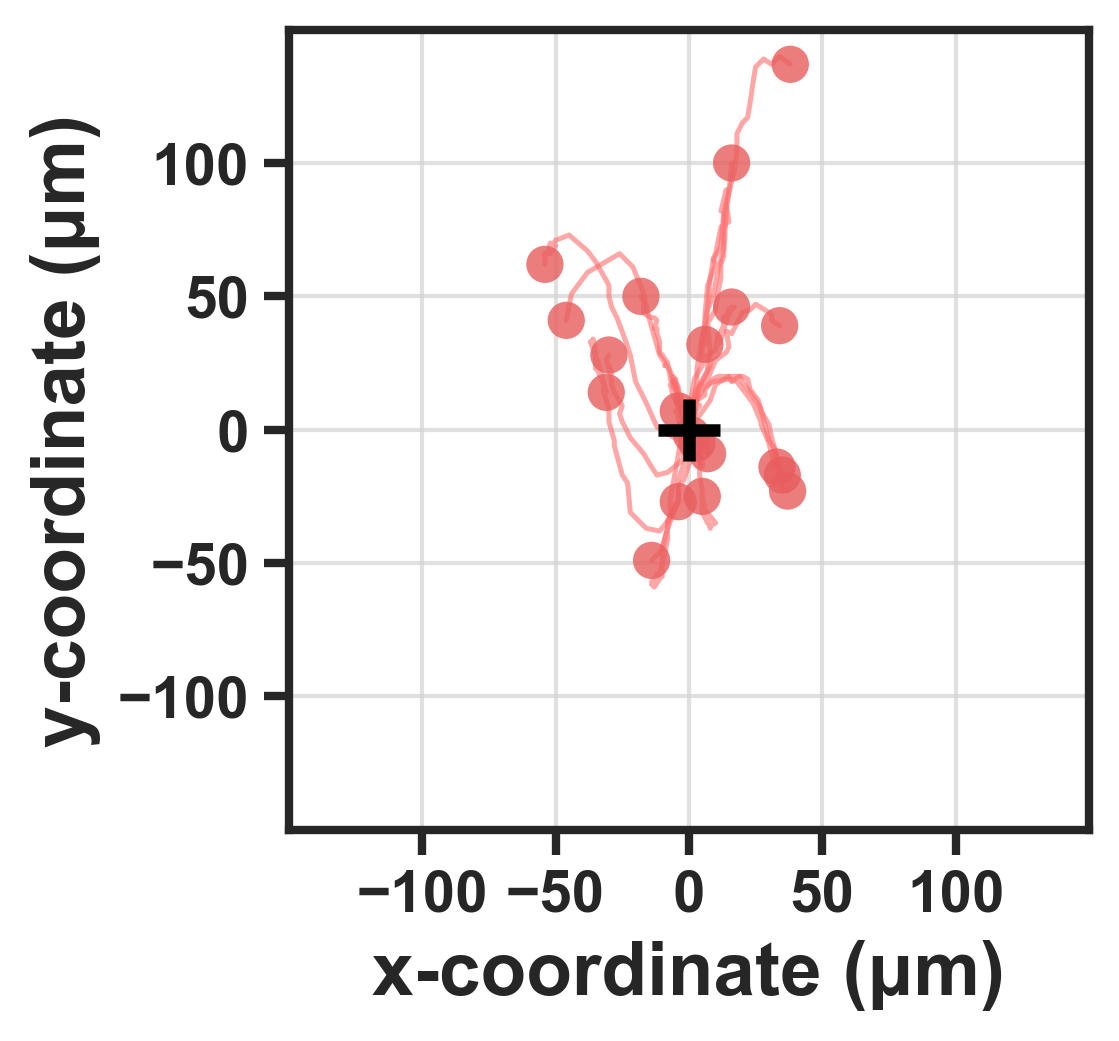

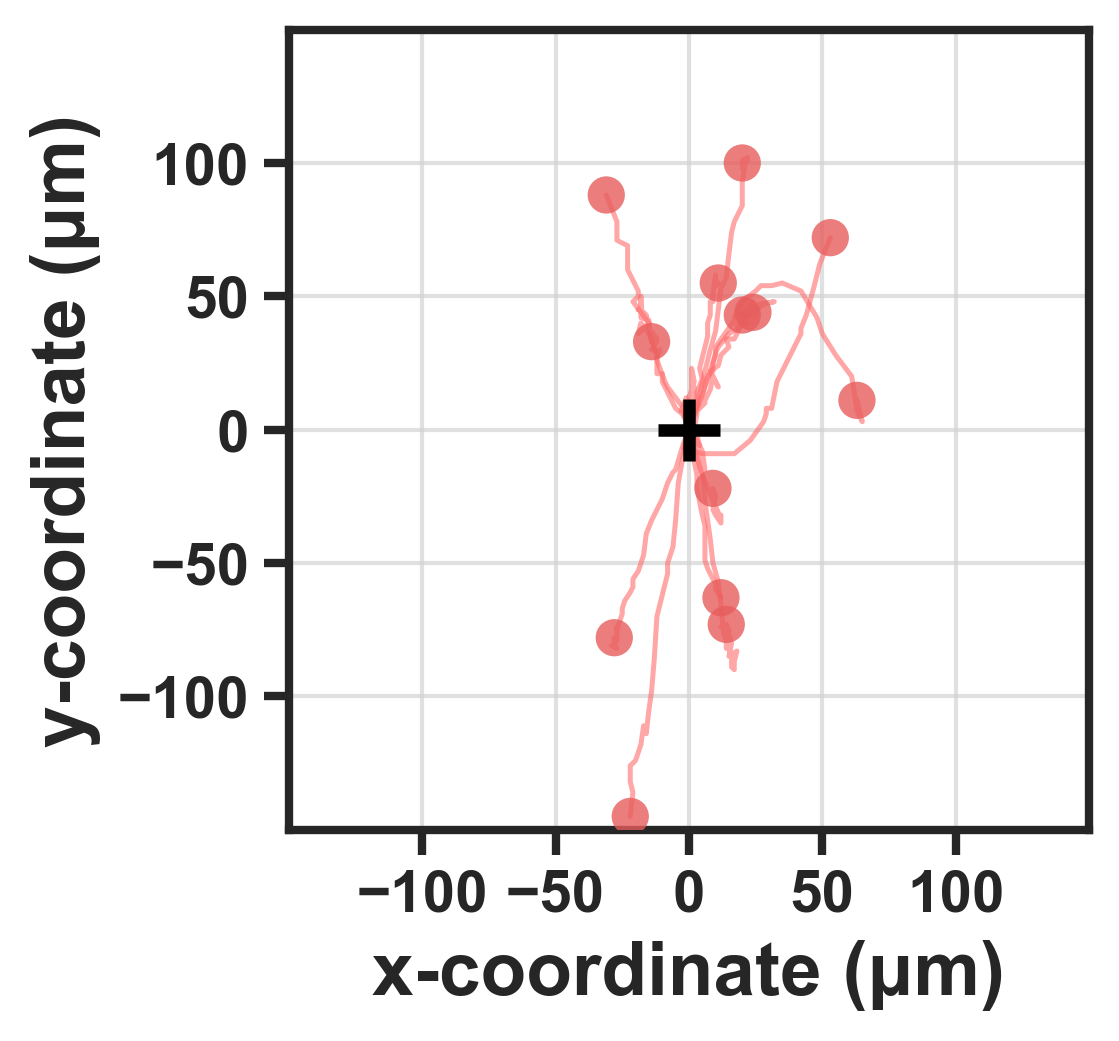

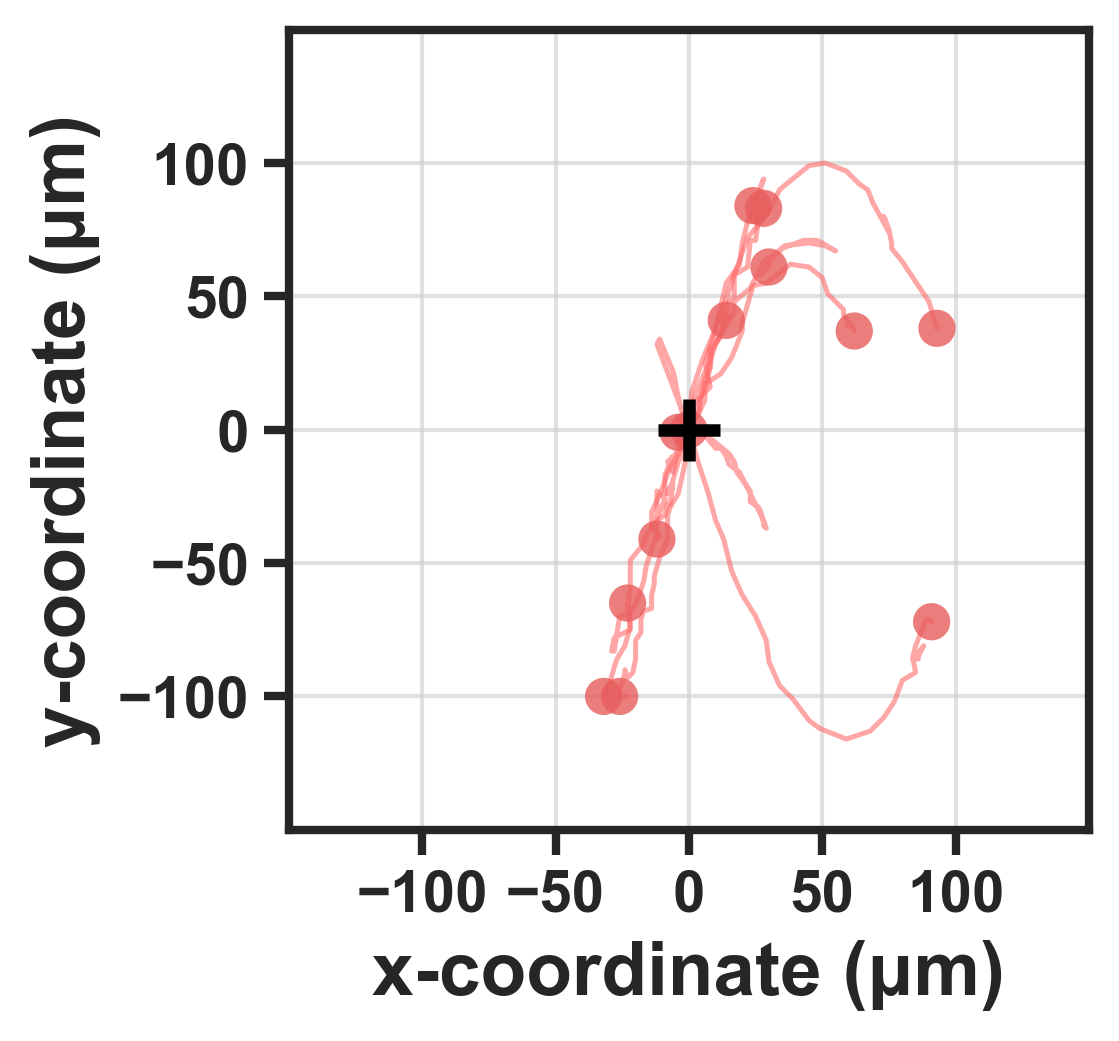

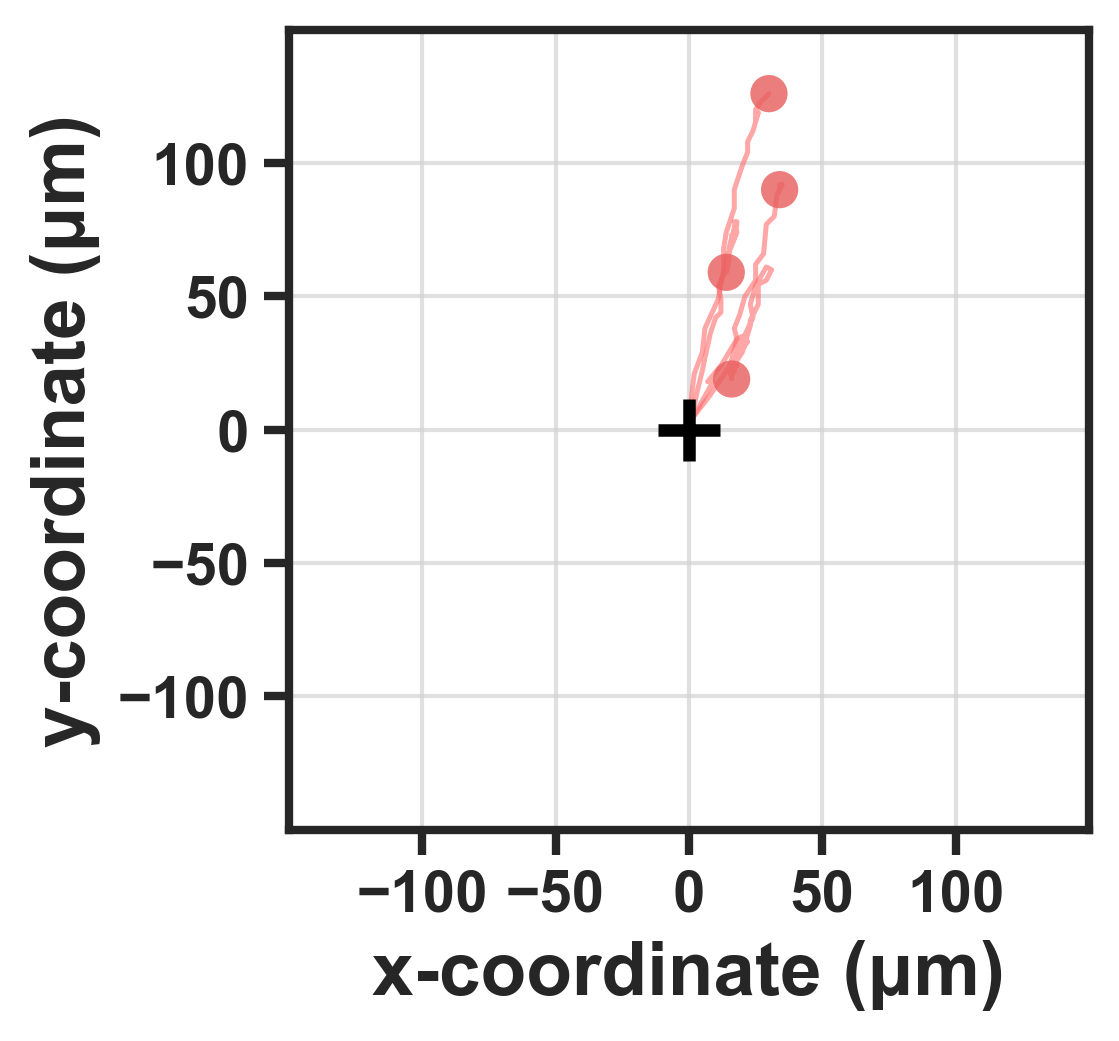

Done! All cell trajectories have been plotted.


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ==================== 常量定义 ====================
FIGURE_SIZE = (4, 4)  # 调整为更方正的比例
DPI = 300
X_RANGE = (-150, 150)
Y_RANGE = (-150, 150)
LABEL_MAP = {50: 'small λ', 100: 'large λ'}
FONT_SIZE = 16  # 增大字体
LABEL_FONT_SIZE = 18  # 坐标轴标签字体
TICK_FONT_SIZE = 14  # 刻度字体
LINE_WIDTH = 1.2  # 增加线宽
MARKER_SIZE = 80  # 端点标记大小
CROSS_SIZE = 200  # 中心十字大小

# ==================== 全局样式设置 ====================
plt.rcParams['font.size'] = FONT_SIZE
plt.rcParams['font.sans-serif'] = ['Arial']  # 使用Arial字体
plt.rcParams['font.weight'] = 'bold'  # 粗体
plt.rcParams['axes.linewidth'] = 2.0  # 加粗边框
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.width'] = 2.0
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['xtick.labelsize'] = TICK_FONT_SIZE
plt.rcParams['ytick.labelsize'] = TICK_FONT_SIZE

# ==================== 查找period变化边界 ====================
def find_period_boundaries(cell_len_df):
    """查找period字段变化的边界索引"""
    boundaries = [-1]
    for idx in range(len(cell_len_df) - 1):
        if cell_len_df.loc[idx, 'period'] != cell_len_df.loc[idx + 1, 'period']:
            boundaries.append(idx)
    boundaries.append(len(cell_len_df))
    return boundaries

# ==================== 主程序 ====================
# 获取period边界
period_boundaries = find_period_boundaries(cell_len)
print(f"Period boundaries: {period_boundaries}")

# 获取所有唯一的period值
periods = cell_len['period'].unique()
print(f"Unique periods: {periods}")

# 遍历每个period
for period_idx, period_value in enumerate(periods):
    # 提取当前period的数据段
    low_bound = period_boundaries[period_idx]
    up_bound = period_boundaries[period_idx + 1]
    data = cell_len.iloc[low_bound + 1:up_bound + 1].copy()
    data.reset_index(drop=True, inplace=True)

    # 查找Distance为-1的分隔点（细胞轨迹分段标记）
    cell_boundaries = list(data.index[data['Distance'] == -1]) + [len(data)]

    # ==================== 创建图表 ====================
    fig, ax = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)

    # 设置背景色为白色
    ax.set_facecolor('white')
    fig.patch.set_facecolor('white')

    # 设置坐标轴范围
    ax.set_xlim(X_RANGE)
    ax.set_ylim(Y_RANGE)

    # 添加网格线（灰色）
    ax.grid(True, color='lightgray', linewidth=1, alpha=0.7)
    ax.set_axisbelow(True)  # 网格线在数据下方

    # 设置坐标轴标签（粗体）
    ax.set_xlabel('x-coordinate (μm)', fontsize=LABEL_FONT_SIZE, fontweight='bold')
    ax.set_ylabel('y-coordinate (μm)', fontsize=LABEL_FONT_SIZE, fontweight='bold')

    # 设置刻度
    ax.set_xticks([-100, -50, 0, 50, 100])
    ax.set_yticks([-100, -50, 0, 50, 100])

    # ==================== 绘制细胞轨迹 ====================
    # 使用浅红色/粉色系
    track_color = '#FF6B6B'  # 浅红色
    marker_color = '#E85D5D'  # 稍深的红色用于标记点

    # 遍历每个轨迹段
    for start_idx, end_idx in zip(cell_boundaries[:-1], cell_boundaries[1:]):
        segment_data = data.iloc[start_idx:end_idx]

        # 按cell ID分组绘制
        for cell_id in segment_data['cell ID'].unique():
            cell_trajectory = segment_data[segment_data['cell ID'] == cell_id][['n_X', 'n_Y']]

            if len(cell_trajectory) > 0:
                x_coords = cell_trajectory['n_X'].values
                y_coords = cell_trajectory['n_Y'].values

                # 绘制轨迹线（半透明）
                ax.plot(x_coords, y_coords,
                       color=track_color,
                       linewidth=LINE_WIDTH,
                       alpha=0.6,
                       zorder=2)

                # 绘制端点（实心圆点）
                ax.scatter(x_coords[-1], y_coords[-1],
                          s=MARKER_SIZE,
                          color=marker_color,
                          alpha=0.8,
                          zorder=3,
                          edgecolors='none')

    # 绘制中心十字标记（黑色粗体）
    ax.plot(0, 0, marker='+',
           markersize=15,
           markeredgewidth=3,
           color='black',
           zorder=4)

    # 添加标签（如果需要）
    # label = LABEL_MAP.get(int(period_value), f'λ={period_value} μm')
    # ax.text(0.05, 0.95, label,
    #        transform=ax.transAxes,
    #        fontsize=FONT_SIZE,
    #        verticalalignment='top',
    #        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # 确保坐标轴比例相等
    ax.set_aspect('equal', adjustable='box')

    # 显示图表
    plt.tight_layout()
    plt.show()

    # 可选：保存图表（高质量）
    # fig.savefig(f'cell_tracks_period_{int(period_value)}.png',
    #             bbox_inches='tight', dpi=300, facecolor='white')
    # fig.savefig(f'cell_tracks_period_{int(period_value)}.pdf',
    #             bbox_inches='tight', facecolor='white')

    plt.close(fig)

print('Done! All cell trajectories have been plotted.')
